In [3]:
import pandas as pd
import seaborn as sns
import numpy as np


from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.discriminant_analysis import StandardScaler
from sklearn.preprocessing import MinMaxScaler, RobustScaler
from sklearn.metrics import precision_score, recall_score, f1_score


In [4]:
ATT_INT = ["Administrative", "Informational", "ProductRelated", "OperatingSystems", "Browser", "Region", "TrafficType"]
ATT_FLOAT = ["Administrative_Duration", "Informational_Duration", "ProductRelated_Duration", "BounceRates", "ExitRates", "PageValues", "SpecialDay"]
ATT_STRING = ["Month", "VisitorType"]
ATT_BOOL = ["Weekend", "Revenue"]

TARGET = "Revenue"

RANDOM_STATES = [0, 1, 5, 7, 13, 23, 29, 32, 37, 42]

SCALERS = [None, MinMaxScaler, StandardScaler, RobustScaler]


In [5]:
df = pd.read_csv('dataset.csv')
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


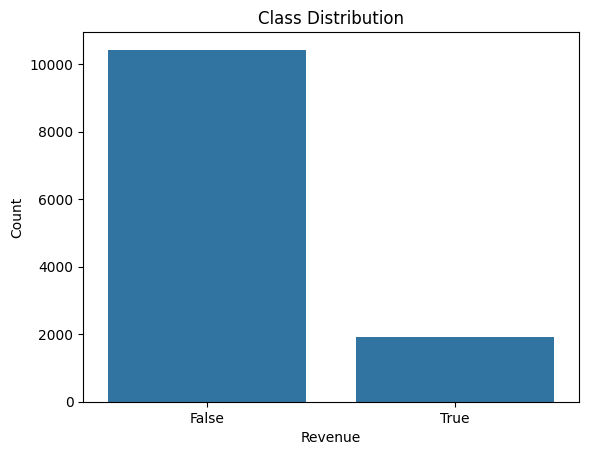

In [31]:
from matplotlib import pyplot as plt
import seaborn as sns

# Count the number of occurrences of each class
class_counts = df[TARGET].value_counts()

# Create a bar plot
sns.barplot(x=class_counts.index, y=class_counts.values)

# Set the labels and title
plt.xlabel('Revenue')
plt.ylabel('Count')
plt.title('Class Distribution')

# Show the plot
plt.show()





## Regresie Logistica

In [19]:
def create_model(df, scaler, state):
    print("Creating model...")
    # Create the logistic regression model
    model = LogisticRegression(max_iter=df.shape[0])
    # Create an instance of LabelEncoder
    label_encoder = LabelEncoder()

    df_copy = df.copy()

    # Convert categorical variables to numerical labels
    for column in df_copy.columns:
        df_copy[column] = label_encoder.fit_transform(df_copy[column])


    # Split the dataset into features (X) and target variable (y)
    X = df_copy.drop(TARGET, axis=1)
    y = df_copy[TARGET]

    # # Apply the scaler if provided
    if scaler is not None:
        scaler = scaler()
        X = scaler.fit_transform(X)


    # Split the dataset into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=state)

    # Fit the model to the data
    model.fit(X_train, y_train)

    return model, X_test, y_test


In [20]:

model_simple, X_test, y_test = create_model(df, None, 42)
# Predict the labels for the test set
y_pred = model_simple.predict(X_test)

# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)

print(f'Test accuracy: {accuracy}')

Creating model...


KeyboardInterrupt: 

In [ ]:


average_accuracy = [[], [], [], []]
average_precision = [[], [], [], []]
average_recall = [[], [], [], []]
average_f1 = [[], [], [], []]
for state in RANDOM_STATES:
    print(f"Random state: {state}")
    for i, scaler in enumerate(SCALERS):
        print(f"Scaler: {scaler.__name__ if scaler is not None else None}")
        model, X_test, y_test = create_model(df, scaler, state)
        # Predict the labels for the test set
        y_pred = model.predict(X_test)

        # Calculate the accuracy score
        accuracy = accuracy_score(y_test, y_pred)

        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)

        print(f'Test accuracy: {accuracy}')
        print(f'Precision: {precision}')
        print(f'Recall: {recall}')
        print(f'F1 score: {f1}\n')

        average_accuracy[i].append(accuracy)
        average_precision[i].append(precision)
        average_recall[i].append(recall)
        average_f1[i].append(f1)




Random state: 0
Scaler: None
Creating model...


Test accuracy: 0.8811841038118411
Precision: 0.7328519855595668
Recall: 0.48104265402843605
F1 score: 0.580829756795422

Scaler: MinMaxScaler
Creating model...
Test accuracy: 0.8815896188158961
Precision: 0.7407407407407407
Recall: 0.47393364928909953
F1 score: 0.5780346820809248

Scaler: StandardScaler
Creating model...
Test accuracy: 0.8811841038118411
Precision: 0.7362637362637363
Recall: 0.476303317535545
F1 score: 0.5784172661870504

Scaler: RobustScaler
Creating model...
Test accuracy: 0.8815896188158961
Precision: 0.7389705882352942
Recall: 0.476303317535545
F1 score: 0.5792507204610952

Random state: 1
Scaler: None
Creating model...
Test accuracy: 0.8961881589618816
Precision: 0.6907630522088354
Recall: 0.49002849002849
F1 score: 0.5733333333333333

Scaler: MinMaxScaler
Creating model...
Test accuracy: 0.8969991889699919
Precision: 0.691699604743083
Recall: 0.4985754985754986
F1 score: 0.5794701986754967

Scaler: StandardScaler
Creating model...
Test accuracy: 0.896999188969991

KeyboardInterrupt: 

In [ ]:

for i, scaler in enumerate(SCALERS):
    print(f"Scaler: {scaler.__name__ if scaler is not None else None}")

    print(f'Variance of accuracy: {np.var(average_accuracy[i])}')
    print(f'Variance of precision: {np.var(average_precision[i])}')
    print(f'Variance of recall: {np.var(average_recall[i])}')
    print(f'Variance of F1 score: {np.var(average_f1[i])}\n')

    print(f'Average accuracy: {np.mean(average_accuracy[i])}')
    print(f'Average precision: {np.mean(average_precision[i])}')
    print(f'Average recall: {np.mean(average_recall[i])}')
    print(f'Average F1 score: {np.mean(average_f1[i])}\n')

Scaler: None
Variance of accuracy: 6.75463678287484e-05
Variance of precision: 0.0003387872804146401
Variance of recall: 0.0004964467360682445
Variance of F1 score: 0.0003995725806428393

Average accuracy: 0.8796431467964314
Average precision: 0.7239139649274141
Average recall: 0.3707234513110739
Average F1 score: 0.4898631981356507

Scaler: MinMaxScaler
Variance of accuracy: 8.183312514923135e-05
Variance of precision: 0.0006859716135845494
Variance of recall: 0.0003406622085245759
Variance of F1 score: 0.0003955898838534125

Average accuracy: 0.872911597729116
Average precision: 0.7630925031037783
Average recall: 0.27069720940128245
Average F1 score: 0.39912146035271423

Scaler: StandardScaler
Variance of accuracy: 6.807258356799275e-05
Variance of precision: 0.0003105376684585742
Variance of recall: 0.0004890320432341643
Variance of F1 score: 0.0003876774311576844

Average accuracy: 0.8812652068126521
Average precision: 0.7390433840393512
Average recall: 0.37065794235241617
Average 

In [5]:
from scipy.special import expit
class MyLogisticRegression:
    def __init__(self, lr=.01, epochs_no=100):
        self.lr = lr
        self.epochs_no = epochs_no
        self.W = None

    def nll(self, Y, T):
        return -np.sum(T * np.log(Y) + (1 - T) * np.log(1 - Y))

    def train(self, X, T):
        (N, D) = X.shape
        X_hat = np.concatenate([X, np.ones((N, 1))], axis=1)
        W = np.random.randn((D+1))

        for _ in range(self.epochs_no):
            W = W - X_hat.T @ (expit(X_hat @ W) - T) * self.lr / N
        self.W =  W


    def predict(self, X):
        y = expit(np.concatenate([X, np.ones((X.shape[0], 1))], axis=1) @ self.W)
        for i in range(len(y)):
            if y[i] >= 0.5:
                y[i] = 1
            else:
                y[i] = 0
        return y

In [6]:
def create_my_model(df, scaler, state):
    print("Creating model...")
    # Create the logistic regression model
    model = MyLogisticRegression(lr=.01, epochs_no=1000)
    # Create an instance of LabelEncoder
    label_encoder = LabelEncoder()

    df_copy = df.copy()

    # Convert categorical variables to numerical labels
    for column in df_copy.columns:
        df_copy[column] = label_encoder.fit_transform(df_copy[column])


    # Split the dataset into features (X) and target variable (y)
    X = df_copy.drop(TARGET, axis=1)
    y = df_copy[TARGET]

    # # Apply the scaler if provided
    if scaler is not None:
        scaler = scaler()
        X = scaler.fit_transform(X)


    # Split the dataset into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=state)

    # Fit the model to the data
    model.train(X_train, y_train)

    return model, X_test, y_test

In [7]:
average_accuracy = [[], [], [], []]
average_precision = [[], [], [], []]
average_recall = [[], [], [], []]
average_f1 = [[], [], [], []]
for state in [42]:
    print(f"Random state: {state}")
    for i, scaler in enumerate(SCALERS):
        print(f"Scaler: {scaler.__name__ if scaler is not None else None}")
        model, X_test, y_test = create_my_model(df, scaler, state)
        # Predict the labels for the test set
        y_pred = model.predict(X_test)
        # Calculate the accuracy score
        accuracy = accuracy_score(y_test, y_pred)

        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)

        print(f'Test accuracy: {accuracy}')
        print(f'Precision: {precision}')
        print(f'Recall: {recall}')
        print(f'F1 score: {f1}\n')

        average_accuracy[i].append(accuracy)
        average_precision[i].append(precision)
        average_recall[i].append(recall)
        average_f1[i].append(f1)




Random state: 42
Scaler: None
Creating model...
Test accuracy: 0.8029197080291971
Precision: 0.4487004103967168
Recall: 0.7980535279805353
F1 score: 0.574430823117338

Scaler: MinMaxScaler
Creating model...
Test accuracy: 0.82441200324412
Precision: 0.21052631578947367
Recall: 0.019464720194647202
F1 score: 0.035634743875278395

Scaler: StandardScaler
Creating model...
Test accuracy: 0.8195458231954582
Precision: 0.4681647940074906
Recall: 0.6082725060827251
F1 score: 0.5291005291005291

Scaler: RobustScaler
Creating model...
Test accuracy: 0.8272506082725061
Precision: 0.4883720930232558
Recall: 0.7664233576642335
F1 score: 0.5965909090909092



## Arbori de decizize

In [6]:
from sklearn.tree import DecisionTreeClassifier

def create_decision_tree_model(df, scaler, state, depth):
    print("Creating model...")
    # Create the logistic regression model



    # Create an instance of LabelEncoder
    label_encoder = LabelEncoder()

    df_copy = df.copy()

    # Convert categorical variables to numerical labels
    for column in df_copy.columns:
        df_copy[column] = label_encoder.fit_transform(df_copy[column])


    # Split the dataset into features (X) and target variable (y)
    X = df_copy.drop(TARGET, axis=1)
    y = df_copy[TARGET]

    # # Apply the scaler if provided
    if scaler is not None:
        scaler = scaler()
        X = scaler.fit_transform(X)


    # Split the dataset into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=state)

    # Create an instance of DecisionTreeClassifier
    clf = DecisionTreeClassifier(random_state=state, max_depth=depth)

    # Fit the model to the data
    clf.fit(X_train, y_train)

    return clf, X_test, y_test


In [25]:
model, X_test, y_test = create_decision_tree_model(df, None, 42, 6)
# Predict the labels for the test set
y_pred = model.predict(X_test)

# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)

print(f'Test accuracy: {accuracy}')
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Test accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 score: {f1}\n')

Creating model...
Test accuracy: 0.8864557988645579
Test accuracy: 0.8864557988645579
Precision: 0.6955223880597015
Recall: 0.5669099756690997
F1 score: 0.6246648793565683



In [22]:
average_accuracy = [[], [], [], []]
average_precision = [[], [], [], []]
average_recall = [[], [], [], []]
average_f1 = [[], [], [], []]
for state in [42]:
    print(f"Random state: {state}")
    for i, scaler in enumerate(SCALERS):
        print(f"Scaler: {scaler.__name__ if scaler is not None else None}")
        model, X_test, y_test = create_decision_tree_model(df, scaler, state)
        # Predict the labels for the test set
        y_pred = model.predict(X_test)
        # Calculate the accuracy score
        accuracy = accuracy_score(y_test, y_pred)

        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)

        print(f'Test accuracy: {accuracy}')
        print(f'Precision: {precision}')
        print(f'Recall: {recall}')
        print(f'F1 score: {f1}\n')

        average_accuracy[i].append(accuracy)
        average_precision[i].append(precision)
        average_recall[i].append(recall)
        average_f1[i].append(f1)

Random state: 42
Scaler: None
Creating model...
Test accuracy: 0.856853203568532
Precision: 0.5700483091787439
Recall: 0.5742092457420924
F1 score: 0.572121212121212

Scaler: MinMaxScaler
Creating model...
Test accuracy: 0.8572587185725872
Precision: 0.5714285714285714
Recall: 0.5742092457420924
F1 score: 0.5728155339805825

Scaler: StandardScaler
Creating model...
Test accuracy: 0.8552311435523114
Precision: 0.5652173913043478
Recall: 0.5693430656934306
F1 score: 0.5672727272727273

Scaler: RobustScaler
Creating model...
Test accuracy: 0.856853203568532
Precision: 0.5700483091787439
Recall: 0.5742092457420924
F1 score: 0.572121212121212



In [ ]:
class MyDecisionTree:
    def __init__(self):
        self.tree = None

    def fit(self, X, y):
        self.tree = self.build_tree(X, y)

    def build_tree(self, X, y):
        # Stopping condition: check if all samples belong to the same class
        if len(set(y)) == 1:
            return {'class': y[0]}

        # Stopping condition: check if there are no more attributes to split on
        if len(X[0]) == 0:
            return {'class': self.get_majority_class(y)}

        # Find the best attribute and value to split on
        best_attr, best_value = self.find_best_split(X, y)

        # Split the data based on the best attribute and value
        left_X, left_y, right_X, right_y = self.split_data(X, y, best_attr, best_value)

        # Recursively build the left and right subtrees
        left_subtree = self.build_tree(left_X, left_y)
        right_subtree = self.build_tree(right_X, right_y)

        # Create a node for the best split
        node = {'attribute': best_attr, 'value': best_value, 'left': left_subtree, 'right': right_subtree}

        return node

    def find_best_split(self, X, y):
        best_attr = None
        best_value = None
        best_score = float('-inf')

        # Iterate over each attribute and its values
        for attr in range(len(X[0])):
            for value in set(X[:, attr]):
                # Split the data based on the attribute and value
                left_X, left_y, right_X, right_y = self.split_data(X, y, attr, value)

                # Calculate the information gain or Gini index
                score = self.calculate_score(left_y, right_y)

                # Update the best split if the score is higher
                if score > best_score:
                    best_attr = attr
                    best_value = value
                    best_score = score

        return best_attr, best_value

    def split_data(self, X, y, attr, value):
        left_X = []
        left_y = []
        right_X = []
        right_y = []

        # Split the data based on the attribute and value
        for i in range(len(X)):
            if X[i][attr] == value:
                left_X.append(X[i])
                left_y.append(y[i])
            else:
                right_X.append(X[i])
                right_y.append(y[i])

        return np.array(left_X), np.array(left_y), np.array(right_X), np.array(right_y)

    def calculate_score(self, left_y, right_y):
        # Calculate the information gain or Gini index
        # Implement your own calculation method here
        # Return the score
         # count all samples at split point
        # Calculate the Gini index for a split dataset

        # count all samples at split point
        n_instances = float(sum([len(group) for group in groups]))
        # sum weighted Gini index for each group
        gini = 0.0
        for group in groups:
            size = float(len(group))
            # avoid divide by zero
            if size == 0:
                continue
            score = 0.0
            # score the group based on the score for each class
            for class_val in classes:
                p = [row[-1] for row in group].count(class_val) / size
                score += p * p
            # weight the group score by its relative size
            gini += (1.0 - score) * (size / n_instances)
        return gini

    def get_majority_class(self, y):
        # Get the majority class in the target variable
        # Implement your own method here
        # Return the majority class
        pass

    def predict(self, X):
        predictions = []

        # Traverse the tree and make predictions for each sample
        for sample in X:
            prediction = self.traverse_tree(sample, self.tree)
            predictions.append(prediction)

        return predictions

    def traverse_tree(self, sample, node):
        # Base case: check if the node is a leaf node
        if 'class' in node:
            return node['class']

        # Get the attribute and value of the current node
        attr = node['attribute']
        value = node['value']

        # Traverse the left or right subtree based on the attribute value of the sample
        if sample[attr] == value:
            return self.traverse_tree(sample, node['left'])
        else:
            return self.traverse_tree(sample, node['right'])


In [33]:
print(df[TARGET].)

[False False False ... False False False]
